In [1]:
# Simulate the Python model

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tellurium as te

In [2]:
run parsemodel.py

['atp', 'adp', 'nad', 'nadh', 'ppi', 'pppi', 'glc', 'g6p', 'f6p', 'fbp', 'gap', 'dhap', 'bpg', 'p3g', 'p2g', 'pep', 'pyr']
[4.0e+00 0.0e+00 2.5e-01 0.0e+00 2.5e+01 0.0e+00 5.0e+02 0.0e+00 0.0e+00
 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
['VmaxHex', 'Keq1', 'Katp1', 'Kglc1', 'Kadp1', 'Kg6p1', 'VmaxPgi', 'Keq2', 'Kg6p2', 'Kf6p2', 'VmaxPfk', 'Keq3', 'Katp3', 'Kf6p3', 'Kadp3', 'Kfbp3', 'VmaxFba', 'Keq4', 'Kfbp4', 'Kdhap4', 'Kgap4', 'VmaxTpi', 'Keq5', 'Kdhap5', 'Kgap5', 'VmaxGap', 'Keq6', 'Kgap6', 'Knad6', 'Kppi6', 'Kbpg6', 'Knadh6', 'VmaxPgk', 'Keq8', 'Kbpg8', 'Kadp8', 'Kp3g8', 'Katp8', 'VmaxPgm', 'Keq9', 'Kp3g9', 'Kp2g9', 'VmaxEno', 'Keq10', 'Kp2g10', 'Kpep10', 'VmaxPyk', 'Keq11', 'Kadp11', 'Kpep11', 'Katp11', 'Kpyr11', 'VmaxPpase', 'Keq22', 'Kpppi22', 'Kppi22', 'VmaxNoxe', 'Knadh23']
[0.05, 1000.0, 0.1, 0.15, 0.1, 0.1, 1.0, 0.5, 0.3, 0.15, 0.5, 300.0, 0.1, 0.03, 0.1, 0.1, 1.0, 0.2, 0.015, 0.1, 0.1, 0.25, 0.04, 1.0, 1.0, 0.5, 0.07, 1.0, 0.05, 0.5, 2.0, 0.1, 2.0, 3

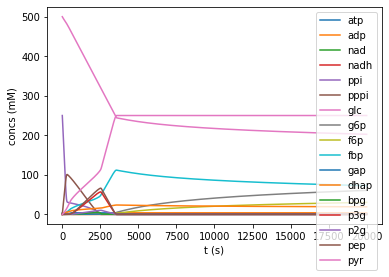

In [53]:
import model_Korman.glycolysis as Korman
PATH_TO_OUTPUT = "./modeloutput/"
FILENAME = "korman.csv"

# Do not use dict as ordering is not guaranteed. Use list instead.
y0 = np.array(Korman.valuesVar)
params = np.array(Korman.valuesPar)
TMAX = 20000 # s
NSTEPS = 10000

keys = ['atp','adp','nad','nadh','ppi','pppi','glc',
        'g6p','f6p','fbp','gap','dhap','bpg','p3g','p2g','pep','pyr']
y0 = [4.0,0.0,0.25,0.0,250.0,0.0,500.0,
      0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

time = np.linspace(0,TMAX,NSTEPS)
sol = odeint(Korman.model, y0, time, args=(params,),atol=1e-11) # Scipy solver

# Plot and save plot
for i in range(sol.shape[1]):
    plt.plot(time,sol[:,i], label=Korman.keysVar[i]);
plt.xlabel('t (s)'); plt.ylabel('concs (mM)'); plt.legend()   
#plt.savefig(PATH_TO_OUTPUT+'plot.pdf',transparent=True)
plt.show() 

# Save data
#df = pd.DataFrame(sol)
#df.to_csv(PATH_TO_OUTPUT+FILENAME, index=None)

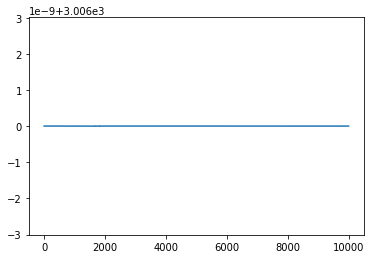

In [54]:
# conservation of mass
atp = sol[:,0]
adp = sol[:,1]
nad = sol[:,2]
nadh = sol[:,3]

ppi = sol[:,4]
pppi = sol[:,5]

glc = sol[:,6]
g6p = sol[:,7]
f6p = sol[:,8]
fbp = sol[:,9]
gap = sol[:,10]
dhap = sol[:,11]
bpg = sol[:,12]
p3g = sol[:,13]
p2g = sol[:,14]
pep = sol[:,15]
pyr = sol[:,16]

    
carbon = 6*glc+6*g6p+6*f6p+6*fbp+3*dhap+3*gap+3*bpg+3*p3g+3*p2g+3*pep+3*pyr
plt.plot(carbon)

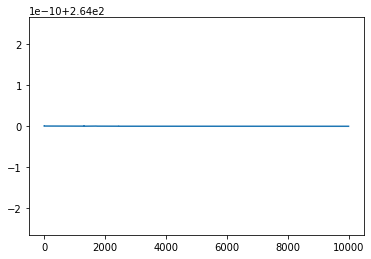

In [55]:
phosphate = 3*atp+2*adp+g6p+f6p+2*fbp+gap+dhap+2*bpg+p3g+p2g+pep+2*pppi+ppi
plt.plot(phosphate)

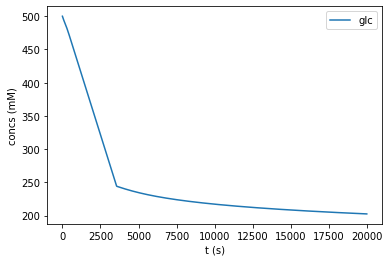

In [56]:
# Plot and save plot

sel = [6]
for i in sel:
    plt.plot(time,sol[:,i], label=Korman.keysVar[i]);
plt.xlabel('t (s)'); plt.ylabel('concs (mM)'); plt.legend()   
#plt.savefig(PATH_TO_OUTPUT+'plotCOF.pdf',transparent=True)
plt.show() 

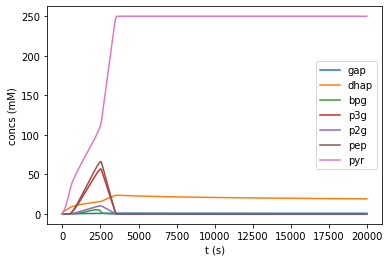

In [57]:
# Plot and save plot

sel = [10,11,12,13,14,15,16]
for i in sel:
    plt.plot(time,sol[:,i], label=Korman.keysVar[i]);
plt.xlabel('t (s)'); plt.ylabel('concs (mM)'); plt.legend()   
#plt.savefig(PATH_TO_OUTPUT+'plotCOF.pdf',transparent=True)
plt.show() 

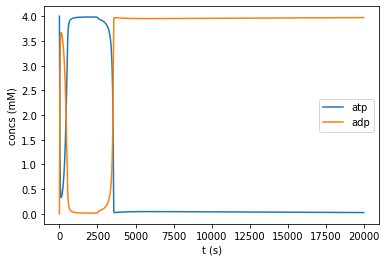

In [58]:
# Plot and save plot

sel = [0,1]
for i in sel:
    plt.plot(time,sol[:,i], label=Korman.keysVar[i]);
plt.xlabel('t (s)'); plt.ylabel('concs (mM)'); plt.legend()   
#plt.savefig(PATH_TO_OUTPUT+'plotCOF.pdf',transparent=True)
plt.show() 